# **CAPSTONE PROJECT: COVID-19 Disease Diagnostic on Device Detector**


---


The recent problem (COVID-19 pandemic) where they are overwhelmed with the increasing number of patients seeking treatment for the disease. Based on the previous presentation it is
stated that the healthcare system needs improvement on technology usage which answers our
research question - What quality improvement programs needed for the healthcare sector, so by
creating an innovative mobile application, it is expected to help the healthcare system handle suspects of COVID-19.

# **Setup**

**Importing Libraries**

In [2]:
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

**Download Dataset**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/tmp'
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 737M/745M [00:08<00:00, 78.0MB/s]
100% 745M/745M [00:08<00:00, 95.1MB/s]


**Unzip Dataset**

In [ ]:
!unzip covid19-radiography-database.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6710.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6711.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6712.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6713.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6714.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6715.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6716.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6717.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6718.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6719.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-672.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6720.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6721.png  
  inflating: COVID-19_Radiography_Dataset/Normal/Normal-6722.png  
  inflating:

**Split Dataset into Training and Testing Data**

In [ ]:
data_train='/content/COVID-19_Radiography_Dataset/train'
data_valid='/content/COVID-19_Radiography_Dataset/validation'
covid_path = '/content/COVID-19_Radiography_Dataset/COVID'
normal_path = '/content/COVID-19_Radiography_Dataset/Normal'
data_covid = os.listdir('/content/COVID-19_Radiography_Dataset/COVID')
data_normal = os.listdir('/content/COVID-19_Radiography_Dataset/Normal')

train_covid, valid_covid = train_test_split(data_covid, test_size=0.2, random_state=122)
train_normal, valid_normal = train_test_split(data_normal, test_size=0.2, random_state=61)

train_covid = train_covid[:2000]
valid_covid = valid_covid[:500]
train_normal = train_normal[:2000]
valid_normal = valid_normal[:500]

**Make Train and Test Directories**

In [ ]:
os.mkdir(data_train)
os.mkdir(data_valid)
os.mkdir(data_train + '/covid')
os.mkdir(data_train + '/normal')
os.mkdir(data_valid + '/covid')
os.mkdir(data_valid + '/normal')

**Move Data to the Train and Test Directories**

In [ ]:
for img_path in train_covid:
  path = covid_path + '/' + img_path
  covid_train = data_train + '/covid'
  shutil.move(path, covid_train)

for img_path in train_normal:
  path = normal_path + '/' + img_path
  normal_train = data_train + '/normal'
  shutil.move(path, normal_train)

for img_path in valid_covid:
  path = covid_path + '/' + img_path
  covid_valid = data_valid + '/covid'
  shutil.move(path, covid_valid)

for img_path in valid_normal:
  path = normal_path + '/' + img_path
  normal_valid = data_valid + '/normal'
  shutil.move(path, normal_valid)

**Check Total Data on Each Directory**

In [ ]:
print(len(os.listdir(covid_train)))
print(len(os.listdir(normal_train)))
print(len(os.listdir(covid_valid)))
print(len(os.listdir(normal_valid)))

2000
2000
500
500


# **Images Preprocessing**

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

valid_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.2,
    height_shift_range=0.2
    )

train_generator = train_datagen.flow_from_directory(
	data_train,
	target_size=(175,175),
	class_mode='binary',
  batch_size=100
)

validation_generator = valid_datagen.flow_from_directory(
	data_valid,
	target_size=(175,175),
	class_mode='binary',
  batch_size=100
)


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **Model Layers**

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape =(175, 175,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 173, 173, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# **Training Model**

In [ ]:
historys = model.fit(train_generator, epochs=60, validation_data = validation_generator, steps_per_epoch=40)

Epoch 1/60
40/40 [==============================] - 68s 896ms/step - loss: 0.6878 - accuracy: 0.5422 - val_loss: 0.6557 - val_accuracy: 0.6590
Epoch 2/60
40/40 [==============================] - 36s 902ms/step - loss: 0.6656 - accuracy: 0.6102 - val_loss: 0.5997 - val_accuracy: 0.6950
Epoch 3/60
40/40 [==============================] - 35s 888ms/step - loss: 0.6048 - accuracy: 0.6820 - val_loss: 0.5672 - val_accuracy: 0.7050
Epoch 4/60
40/40 [==============================] - 36s 893ms/step - loss: 0.5393 - accuracy: 0.7343 - val_loss: 0.5276 - val_accuracy: 0.7180
Epoch 5/60
40/40 [==============================] - 36s 893ms/step - loss: 0.4994 - accuracy: 0.7558 - val_loss: 0.5086 - val_accuracy: 0.7400
Epoch 6/60
40/40 [==============================] - 36s 892ms/step - loss: 0.4809 - accuracy: 0.7655 - val_loss: 0.5041 - val_accuracy: 0.7380
Epoch 7/60
40/40 [==============================] - 36s 891ms/step - loss: 0.4764 - accuracy: 0.7747 - val_loss: 0.4881 - val_accuracy: 0.7660

**Save Model**

In [ ]:
model.save("xray-model.h5")

# **Visualization**

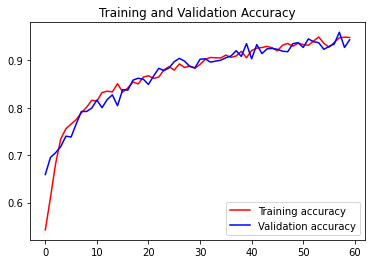

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = historys.history['accuracy']
val_acc = historys.history['val_accuracy']
loss = historys.history['loss']
val_loss = historys.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.figure()

plt.show()

# **Prediction**

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(175, 175))
  x = image.img_to_array(img)
  x =x/255.
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  print(classes)

Saving normal.jpeg to normal.jpeg
normal.jpeg
[[0.00114686 0.9988531 ]]


In [ ]:
normal_upload = files.upload()
for fn in normal_upload.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(175, 175))
  x = image.img_to_array(img)
  x =x/255.
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)
  print(classes)

Saving covid.webp to covid.webp
covid.webp
[[0.99839276 0.0016072 ]]


# **Load and Convert Model**

In [ ]:
model = tf.keras.models.load_model('/content/xray-model.h5')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpab3ck_04/assets


In [ ]:
with open('xray-model.tflite', 'wb') as f:
  f.write(tflite_model)

# **Adding Metadata into Model**

In [ ]:
interpreter = tf.lite.Interpreter(model_path="/content/sample_data/xray-model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))


In [ ]:
pip install tflite-support-nightly

     |████████████████████████████████| 1.1MB 7.4MB/s 
     |████████████████████████████████| 194kB 20.8MB/s 


In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "xray-model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "label.txt"
_SAVE_TO_PATH = "xray-model_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)


{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba

In [3]:
pip freeze > requirement.txt